In [4]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import plot , init_notebook_mode
init_notebook_mode(connected = True)
import warnings 
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Mall_Customers.csv")  # Replace with your dataset path
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
cols = df.columns 
cols

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
# Step 3: Check for Missing Values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [20]:
df_duplicated = df[df.duplicated()]
df_duplicated

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


<Figure size 800x400 with 0 Axes>

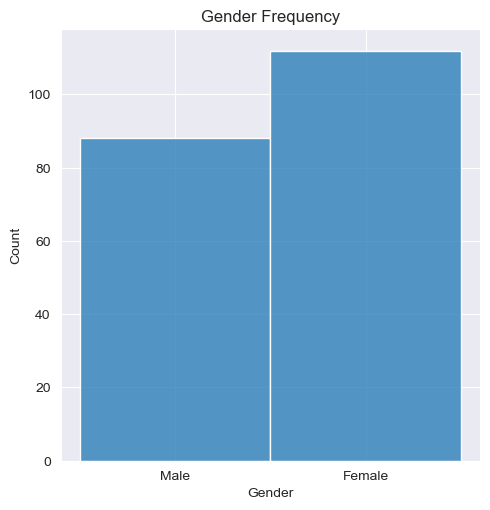

In [22]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
sns.displot(df["Gender"] , bins=30)
plt.title("Gender Frequency")
plt.show()

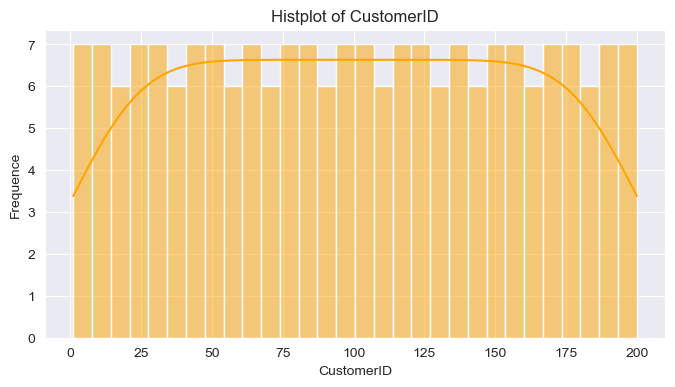

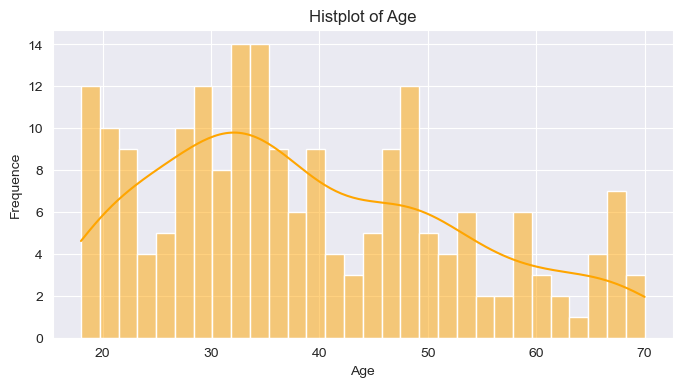

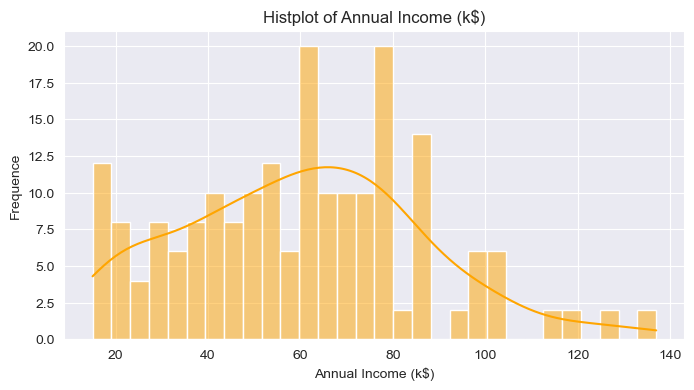

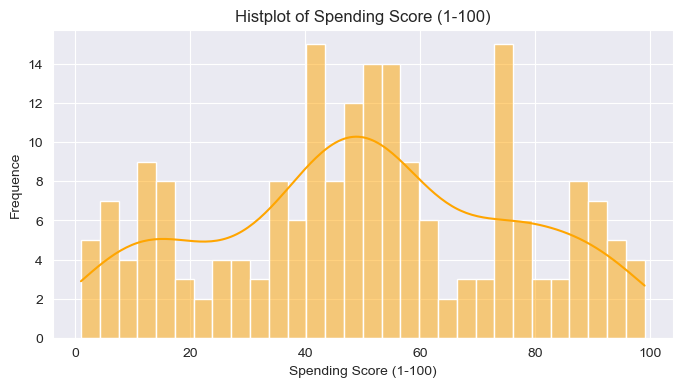

In [24]:
numeric_cols = df.select_dtypes(include = ["int64"])

for numeric_col in numeric_cols.columns :
    plt.figure(figsize=(8,4))
    sns.histplot(df[numeric_col] , bins=30 , kde=True , color="orange")
    plt.xlabel(numeric_col)
    plt.ylabel("Frequence")
    plt.title(f"Histplot of {numeric_col}")
    plt.show()

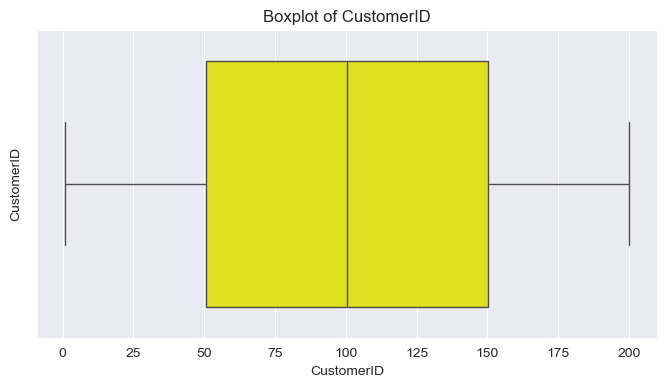

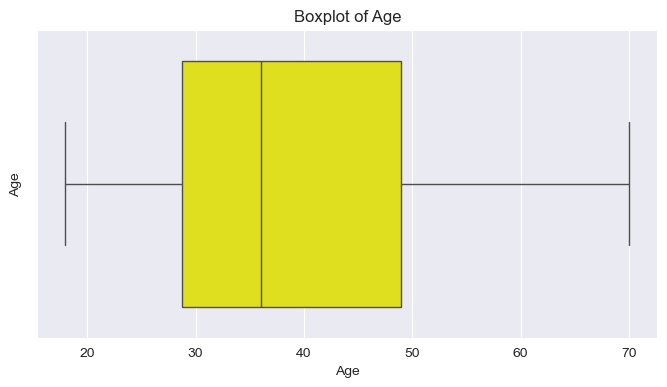

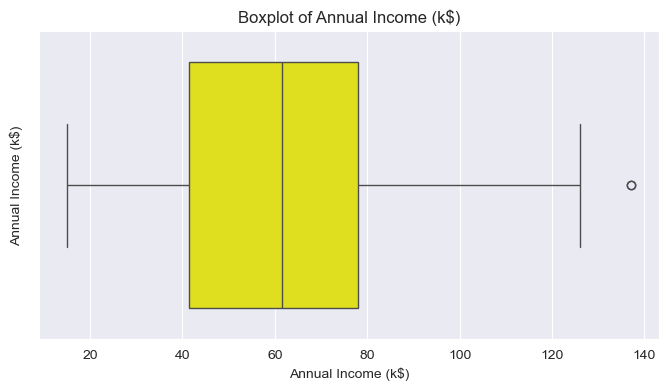

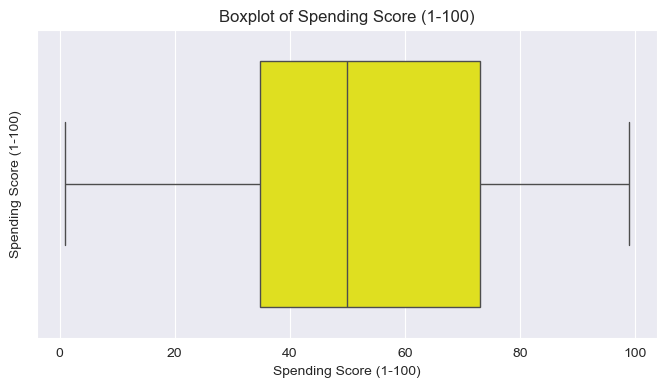

In [26]:
for numeric_col in numeric_cols.columns : 
    plt.figure(figsize=(8,4))
    sns.boxplot(data = df[numeric_col] , orient = "h" , color = "yellow")
    plt.ylabel(numeric_col)
    plt.title(f"Boxplot of {numeric_col}")


In [30]:
numeric_cols = df[["Age" , "Annual Income (k$)" , "Spending Score (1-100)" ]]
correlation = numeric_cols.corr()
correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [32]:
numeric_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [34]:
outliers=numeric_cols.quantile(q=.99)
outliers

Age                        69.01
Annual Income (k$)        126.11
Spending Score (1-100)     97.01
Name: 0.99, dtype: float64

In [38]:
df_non_outliers = numeric_cols[numeric_cols["Age"] <= outliers["Age"]]

In [40]:
df_non_outliers = numeric_cols[numeric_cols["Annual Income (k$)"] <= outliers["Annual Income (k$)"]]

In [42]:
df_non_outliers = numeric_cols[numeric_cols["Spending Score (1-100)"] <= outliers["Spending Score (1-100)"]]

In [44]:
df_non_outliers

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


<Axes: >

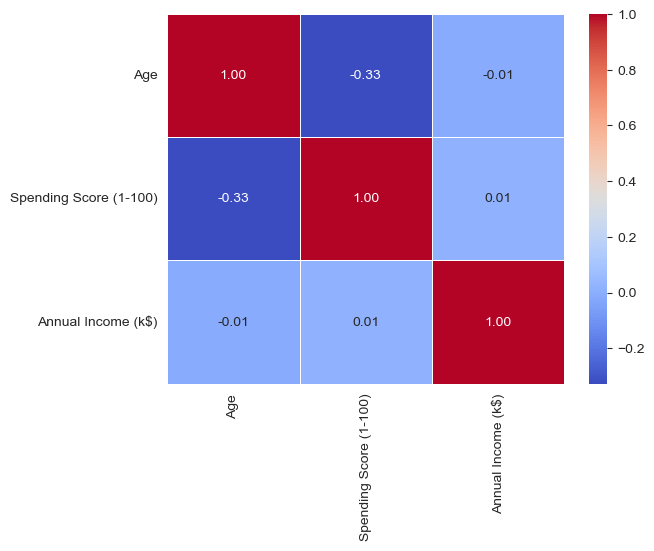

In [48]:
numeric_cols = df[["Age" , "Spending Score (1-100)" , "Annual Income (k$)"]]
correlation = numeric_cols.corr()
sns.heatmap(correlation , annot = True , cmap = "coolwarm"  ,fmt = ".2f" , linewidths = 0.5)

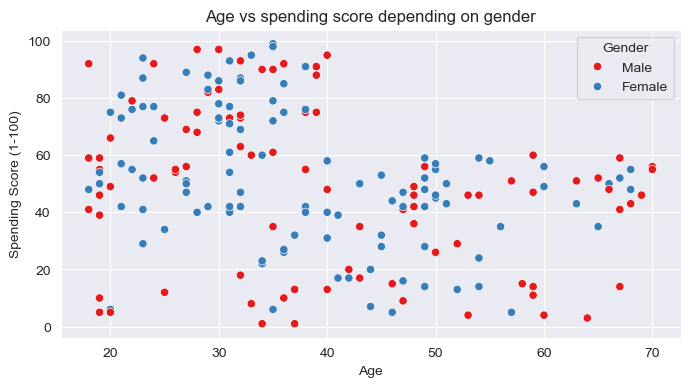

In [50]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="Age" , y = "Spending Score (1-100)" , hue="Gender" , palette = "Set1")
plt.title("Age vs spending score depending on gender")
plt.show()

Text(0.5, 1.0, 'Age vs annual income depending on gender')

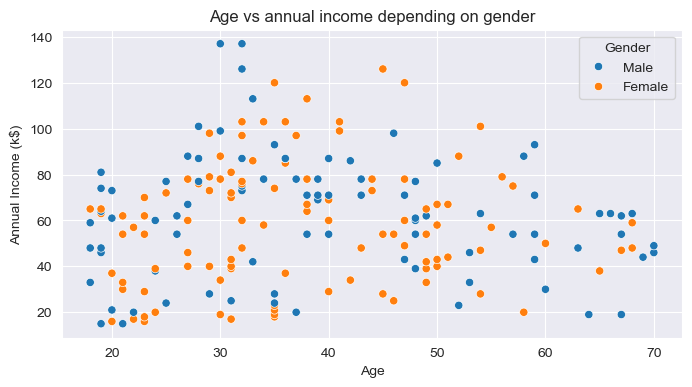

In [52]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df , x="Age" , y="Annual Income (k$)" , hue="Gender")
plt.title("Age vs annual income depending on gender")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

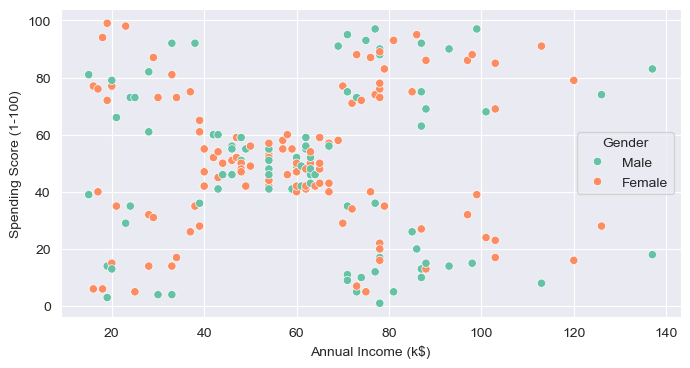

In [54]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = df , x="Annual Income (k$)" , y = "Spending Score (1-100)" , hue="Gender" , palette = "Set2")

Text(0.5, 1.0, 'Gender vs Annual income')

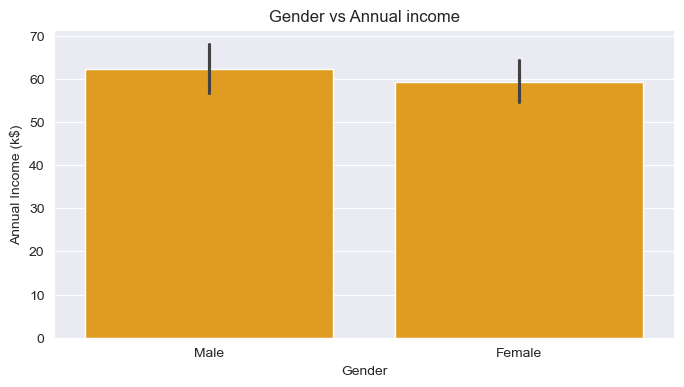

In [56]:
plt.figure(figsize = (8,4))
sns.barplot (data = df , x="Gender" , y = "Annual Income (k$)" , color = "orange")
plt.title("Gender vs Annual income")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

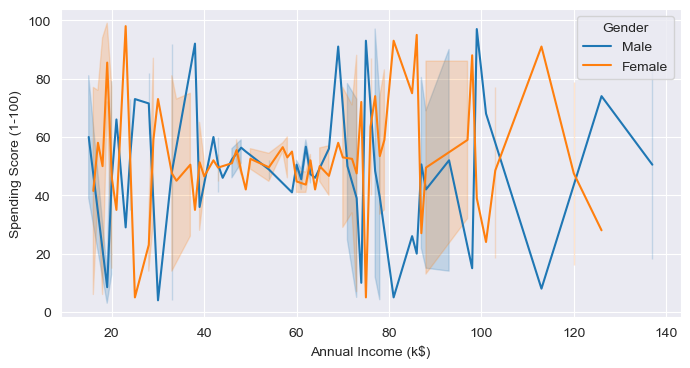

In [58]:
plt.figure(figsize = (8,4))
sns.lineplot(data = df , x="Annual Income (k$)" , y = "Spending Score (1-100)" , hue="Gender" )

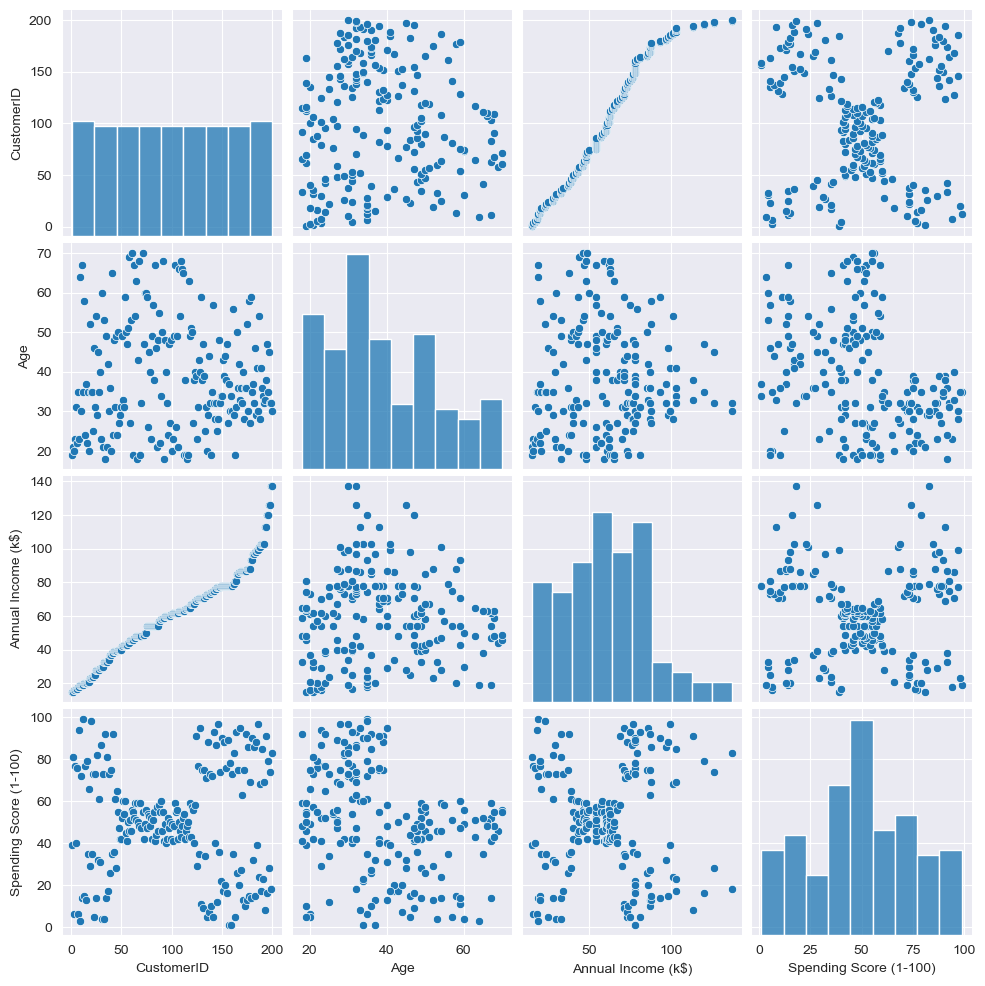

In [60]:
sns.pairplot(df)

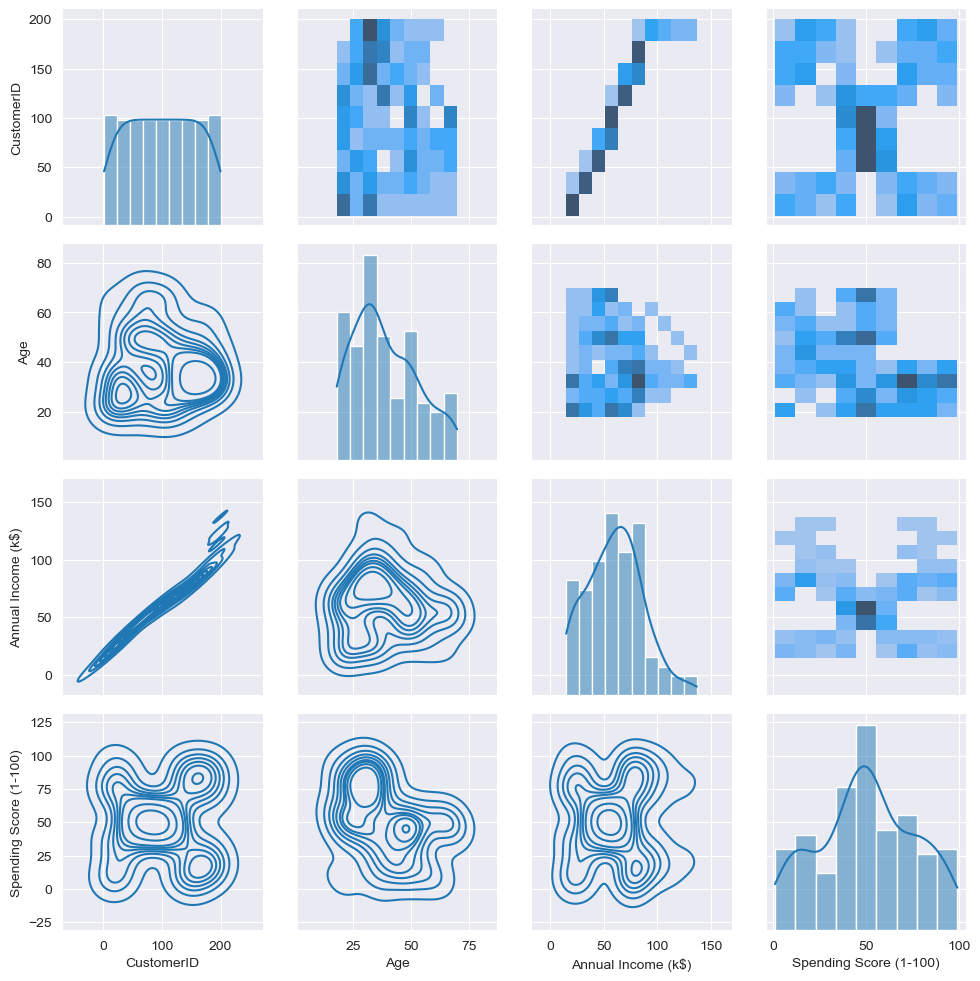

In [62]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot , kde = True)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [68]:
X = df[["Age" , "Spending Score (1-100)" , "Annual Income (k$)"]]
y = df["Gender"]

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [72]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

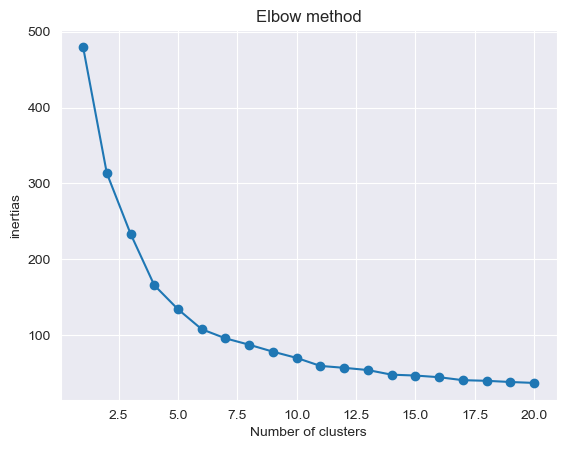

In [74]:
wcss=[]

for i in range(1,21) :
    kmeans = KMeans(n_clusters = i , init='k-means++' , random_state = 42)
    kmeans.fit(X_train,y_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,21) , wcss , marker = "o")
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("inertias")
plt.show()

In [76]:
model = KMeans(n_clusters = 6 , init='k-means++' , random_state = 42)

In [78]:
model.fit(X_train , y_train)

KMeans(n_clusters=6, random_state=42)

In [80]:
y_pred = model.predict(X_test)

In [82]:
print( "Accuracy_score : " , accuracy_score(y_pred,y_test))

Accuracy_score :  0.0
